## Peri-tumoral  
#### train에 쓸 (best의 앞뒤 영상 포함하여 80*3개의 데이터 사용)     
- image 폴더 : './TCIA/peritumoral_patches'    
- mask 폴더 : './TCIA/dilation15_mask'   
( 전체를 random sample 80%한 training_data와 merge해서 train으로 이용 )   

#### test에 쓸 (best만 사용하여 20개의 데이터 사용)    
- image 폴더 : './TCIA','best_image'   
- mask 폴더 : './TCIA/dilation15_mask'  
( 전체를 random sample 20%한 testing_data와 merge해서 test로 이용 )  

In [2]:
import os
import random
import SimpleITK as sitk
from radiomics import firstorder
import pandas as pd
import numpy as np
from radiomics import featureextractor
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
random.seed(42)

## 1.  데이터 로드

In [4]:
org=pd.read_csv('./label.csv',sep=',') # 환자 정보 데이터 
df=pd.DataFrame(org[['PatientID','recurrence']]) # 환자ID와 재발정보 사용 / 데이터프레임 형태로 변경
df['PatientID']=df['PatientID'].str.slice(start=-3) # 다른 데이터와 합병을 위해 PatientID slice 
df=df.set_index('PatientID')
df # total:100 -'recurrence' : 68 , 'non-recurrence' : 32

,recurrence
PatientID,
004,1
005,1
006,1
007,1
008,1
...,...
285,1
288,1
290,1


In [5]:
training_data = df.sample(frac=0.8, random_state=42) # 80: 55(1), 25(0)
testing_data = df.drop(training_data.index) # 20: 13(1), 7(0)

In [6]:
training_data

,recurrence
PatientID,
250,0
131,1
200,1
114,0
109,1
...,...
146,1
222,0
073,1


## 2. train data

- 80개 데이터에 앞뒤 영상까지 추가해 데이터 증대(80*3)

In [51]:
peri_image = []
peri_mask = []
for x in os.listdir(os.path.join('./TCIA','peritumoral_patches')):
    peri_image.append(os.path.join('./TCIA','peritumoral_patches',x))
# 전달 필요 파일
for x in os.listdir(os.path.join('./TCIA','dilation15_mask')):
    if ('Store' not in x):
        peri_mask.append(os.path.join('./TCIA','dilation15_mask',x))

In [52]:
patientId=[]
for i in range(len(peri_mask)):
    patientId.append(peri_image[i][-10:-7])

### 2-1. feature extraction[특징추출]

In [53]:
peri_df_list=[]
for i in range(len(peri_image)):
    featureName=[]
    featureValue=[]
    
    img = sitk.ReadImage(peri_image[i])
    #image2d = sitk.JoinSeries(img)
    msk = sitk.ReadImage(peri_mask[i])
    #mask2d = sitk.JoinSeries(msk)

    settings = {'label': 2}
    extractor = featureextractor.RadiomicsFeatureExtractor(force2D=True, force2Ddimension=0, additionalInfo=True,**settings)
    extractor.enableAllFeatures()
    result = extractor.execute(img, msk, label=255)
    
    for key, value in result.items():
        if (key.startswith('original')):
            featureName.append(key)
            featureValue.append(value)
    
    df=pd.DataFrame([featureValue], columns=featureName)
    peri_df_list.append(df)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

In [54]:
patient_features=peri_df_list[0]
for i in range(1,len(peri_df_list)):
    patient_features=pd.concat([patient_features,peri_df_list[i]])
patient_features

,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.697961,201.061536,178.1937148162078,10873.0,140.333183,890.2813126546343,0.08188000668211481,10873.0,0.415195,0.0,...,6.086755092952267,0.02542079723923578,5.67122905145728,0.1020877402740734,284.2095292589887,14.492399380099364,0.004274666907795675,3.463301920902839,0.0136273258516092,0.242419747467223
0,0.726765,216.980548,207.42227459942677,11027.0,157.693823,992.2569260369944,0.08998430452861109,11027.0,0.375154,0.0,...,10.018763477165303,0.010710329504647443,6.033204218522274,0.1343067017321121,158.76696448965765,8.944024010126718,0.004195273687678672,6.458997784406776,0.023599101864494754,0.30449789945517014
0,0.961729,210.915975,190.79046097748179,11575.0,202.843970,1019.2863632885171,0.08805929704436433,11575.0,0.374170,0.0,...,9.285361163275061,0.007991746553568602,5.852884312526747,0.10401727861771058,276.91147103784726,9.055567699806518,0.005944984115464688,4.83898185259359,0.014876046311653571,0.42688345478064355
0,0.663556,196.320345,173.3666634621547,10136.0,130.269543,808.3818177180226,0.07975353371330136,10136.0,0.441491,0.0,...,9.863087773142798,0.013999987807188032,6.0459416105434975,0.11345698500394633,236.4558064272212,19.60975979576293,0.003645275428502378,5.370713736849109,0.0247974606047962,0.28802799690703895
0,0.870446,120.743565,110.42191811411355,6602.0,105.100748,521.6467529817271,0.07901344334773207,6602.0,0.552162,0.0,...,11.07486466136885,0.010880504808572085,5.564622119152137,0.19357770372614358,44.535862715853455,10.530917914324846,0.003701151886819426,10.112332194850756,0.05960260152626668,0.1624621512926747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.871299,120.725094,112.58774356030055,6603.0,105.187653,525.6883835420698,0.07961356709708765,6603.0,0.547958,0.0,...,5.753236696391242,0.015352921581382704,5.758743413155767,0.12479176132061184,218.9840450914318,6.529388030038281,0.0067444341564784314,3.669851946125432,0.01982616383046295,0.2788308882271618
0,0.941476,118.589327,110.11357772772621,6691.0,111.649053,528.6173157302043,0.07900423191304802,6691.0,0.548541,0.0,...,4.546008668070492,0.00981408660010292,5.667811305802854,0.1603646689583022,42.66108644879092,6.940084469118466,0.0034891800739710347,5.112349498129314,0.011486719449577281,0.13824573390494788
0,0.793002,191.663979,172.10461934532728,10902.0,151.989964,889.9970414071722,0.0816361256106377,10902.0,0.415881,0.0,...,6.178804086869468,0.017461869957901718,5.900270331765461,0.10897083104017612,276.0882818079788,21.019895755411305,0.0031288547450278995,4.2836148994220125,0.01893924635356497,0.19509187821398977
0,0.939463,106.195260,100.43903623591775,6033.0,99.766489,493.0609665441002,0.08172732745634016,6033.0,0.558433,80.0,...,6.743154837638487,0.01147268013474819,5.174067061253285,0.23288579479529256,14.040995428122745,6.796356984130547,0.0024906327767768824,13.80478877413381,0.013957484373379759,0.18063564303614887


In [55]:
patient_features['PatientID']=patientId
patient_features=patient_features.set_index('PatientID')

In [56]:
patient_features.columns=patient_features.columns.str.replace('original','peri')
patient_features_peri=patient_features.astype(float)
patient_features_peri

,peri_shape2D_Elongation,peri_shape2D_MajorAxisLength,peri_shape2D_MaximumDiameter,peri_shape2D_MeshSurface,peri_shape2D_MinorAxisLength,peri_shape2D_Perimeter,peri_shape2D_PerimeterSurfaceRatio,peri_shape2D_PixelSurface,peri_shape2D_Sphericity,peri_firstorder_10Percentile,...,peri_glszm_SmallAreaHighGrayLevelEmphasis,peri_glszm_SmallAreaLowGrayLevelEmphasis,peri_glszm_ZoneEntropy,peri_glszm_ZonePercentage,peri_glszm_ZoneVariance,peri_ngtdm_Busyness,peri_ngtdm_Coarseness,peri_ngtdm_Complexity,peri_ngtdm_Contrast,peri_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
099,0.697961,201.061536,178.193715,10873.0,140.333183,890.281313,0.081880,10873.0,0.415195,0.0,...,6.086755,0.025421,5.671229,0.102088,284.209529,14.492399,0.004275,3.463302,0.013627,0.242420
239,0.726765,216.980548,207.422275,11027.0,157.693823,992.256926,0.089984,11027.0,0.375154,0.0,...,10.018763,0.010710,6.033204,0.134307,158.766964,8.944024,0.004195,6.458998,0.023599,0.304498
173,0.961729,210.915975,190.790461,11575.0,202.843970,1019.286363,0.088059,11575.0,0.374170,0.0,...,9.285361,0.007992,5.852884,0.104017,276.911471,9.055568,0.005945,4.838982,0.014876,0.426883
225,0.663556,196.320345,173.366663,10136.0,130.269543,808.381818,0.079754,10136.0,0.441491,0.0,...,9.863088,0.014000,6.045942,0.113457,236.455806,19.609760,0.003645,5.370714,0.024797,0.288028
063,0.870446,120.743565,110.421918,6602.0,105.100748,521.646753,0.079013,6602.0,0.552162,0.0,...,11.074865,0.010881,5.564622,0.193578,44.535863,10.530918,0.003701,10.112332,0.059603,0.162462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.871299,120.725094,112.587744,6603.0,105.187653,525.688384,0.079614,6603.0,0.547958,0.0,...,5.753237,0.015353,5.758743,0.124792,218.984045,6.529388,0.006744,3.669852,0.019826,0.278831
078,0.941476,118.589327,110.113578,6691.0,111.649053,528.617316,0.079004,6691.0,0.548541,0.0,...,4.546009,0.009814,5.667811,0.160365,42.661086,6.940084,0.003489,5.112349,0.011487,0.138246
099,0.793002,191.663979,172.104619,10902.0,151.989964,889.997041,0.081636,10902.0,0.415881,0.0,...,6.178804,0.017462,5.900270,0.108971,276.088282,21.019896,0.003129,4.283615,0.018939,0.195092


In [57]:
patient_features_peri_train=pd.merge(training_data,patient_features_peri,on='PatientID')
patient_features_peri_train

,recurrence,peri_shape2D_Elongation,peri_shape2D_MajorAxisLength,peri_shape2D_MaximumDiameter,peri_shape2D_MeshSurface,peri_shape2D_MinorAxisLength,peri_shape2D_Perimeter,peri_shape2D_PerimeterSurfaceRatio,peri_shape2D_PixelSurface,peri_shape2D_Sphericity,...,peri_glszm_SmallAreaHighGrayLevelEmphasis,peri_glszm_SmallAreaLowGrayLevelEmphasis,peri_glszm_ZoneEntropy,peri_glszm_ZonePercentage,peri_glszm_ZoneVariance,peri_ngtdm_Busyness,peri_ngtdm_Coarseness,peri_ngtdm_Complexity,peri_ngtdm_Contrast,peri_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
250,0,0.876491,98.989608,94.810337,5201.0,86.763457,412.634560,0.079338,5201.0,0.619559,...,5.750637,0.007753,5.603599,0.126899,57.438703,9.028602,0.005441,3.042720,0.037978,0.157999
250,0,0.842926,99.396966,95.425364,5174.0,83.784291,409.462987,0.079139,5174.0,0.622735,...,5.913419,0.018016,5.519471,0.124082,82.111761,10.774463,0.005292,3.298882,0.042450,0.170287
250,0,0.828557,92.595582,90.138782,4691.0,76.720762,374.048773,0.079738,4691.0,0.649097,...,5.350738,0.011241,5.487281,0.118951,79.907982,13.948310,0.006125,1.927970,0.054873,0.142247
131,1,0.763111,128.668941,120.208153,6683.0,98.188648,532.617316,0.079697,6683.0,0.544096,...,7.017246,0.022966,5.906692,0.156816,54.023016,7.121987,0.003291,10.234465,0.025245,0.151088
131,1,0.870703,125.533777,116.846053,6895.0,109.302629,545.203102,0.079072,6895.0,0.539901,...,8.482288,0.021132,5.810544,0.196374,38.142880,6.337776,0.003620,9.476482,0.025770,0.121257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1,0.934198,148.208566,134.033578,8629.0,138.456174,690.215295,0.079988,8629.0,0.477090,...,6.750017,0.014306,5.836574,0.148337,55.962036,7.574558,0.003222,7.360352,0.018157,0.167858
284,1,0.930032,126.867936,115.741090,7424.0,117.991256,591.244733,0.079640,7424.0,0.516603,...,7.506580,0.012782,5.740317,0.173895,34.036938,6.269245,0.003382,7.931803,0.016641,0.142649
151,1,0.894568,151.588953,134.301899,8562.0,135.606635,684.298557,0.079923,8562.0,0.479344,...,7.129543,0.014408,5.587364,0.223896,18.638018,11.188188,0.002381,9.668043,0.020169,0.102390


### 2-2. feature selection[특징선택] - ReliefF 사용 

In [58]:
from skrebate import ReliefF

feature, labels = patient_features_peri_train.drop('recurrence',axis=1).values, patient_features_peri_train['recurrence'].values
fs=ReliefF() 
fs.fit(feature, labels)

important_features_dict_reliefF={}
for idx, val in zip(patient_features_peri_train.drop('recurrence',axis=1).columns, fs.feature_importances_):
    important_features_dict_reliefF[idx] = val

In [59]:
important_features_dict_reliefF=sorted(important_features_dict_reliefF.items(), key=(lambda x:x[1]), reverse=True)
important_features_dict_reliefF

[('peri_glcm_Idm', 0.09192853091024222),
 ('peri_glcm_Id', 0.09141825131981286),
 ('peri_gldm_LargeDependenceEmphasis', 0.09078243495389778),
 ('peri_firstorder_Median', 0.09070576263149857),
 ('peri_glrlm_RunPercentage', 0.09056189736088309),
 ('peri_glszm_ZonePercentage', 0.09056189736088309),
 ('peri_gldm_DependenceNonUniformityNormalized', 0.08659341574680952),
 ('peri_glcm_DifferenceEntropy', 0.08486773655091996),
 ('peri_gldm_SmallDependenceEmphasis', 0.08459081052114233),
 ('peri_glcm_InverseVariance', 0.08235853162837792),
 ('peri_firstorder_Mean', 0.08048007320395173),
 ('peri_glcm_SumAverage', 0.07999738394777381),
 ('peri_glcm_JointAverage', 0.07999738394777378),
 ('peri_gldm_DependenceVariance', 0.07903157141157315),
 ('peri_glcm_DifferenceAverage', 0.07449187875706609),
 ('peri_glcm_MaximumProbability', 0.07346486303101529),
 ('peri_glcm_JointEntropy', 0.07217383990606092),
 ('peri_gldm_SmallDependenceHighGrayLevelEmphasis', 0.07087387707671669),
 ('peri_glrlm_RunLengthNon

In [60]:
reliefF_list=list(list(zip(*important_features_dict_reliefF))[0])
reliefF_list.append('recurrence')
reliefF_list

['peri_glcm_Idm',
 'peri_glcm_Id',
 'peri_gldm_LargeDependenceEmphasis',
 'peri_firstorder_Median',
 'peri_glrlm_RunPercentage',
 'peri_glszm_ZonePercentage',
 'peri_gldm_DependenceNonUniformityNormalized',
 'peri_glcm_DifferenceEntropy',
 'peri_gldm_SmallDependenceEmphasis',
 'peri_glcm_InverseVariance',
 'peri_firstorder_Mean',
 'peri_glcm_SumAverage',
 'peri_glcm_JointAverage',
 'peri_gldm_DependenceVariance',
 'peri_glcm_DifferenceAverage',
 'peri_glcm_MaximumProbability',
 'peri_glcm_JointEntropy',
 'peri_gldm_SmallDependenceHighGrayLevelEmphasis',
 'peri_glrlm_RunLengthNonUniformityNormalized',
 'peri_glszm_SizeZoneNonUniformityNormalized',
 'peri_gldm_LargeDependenceLowGrayLevelEmphasis',
 'peri_gldm_DependenceEntropy',
 'peri_firstorder_RootMeanSquared',
 'peri_gldm_LowGrayLevelEmphasis',
 'peri_shape2D_Sphericity',
 'peri_glrlm_RunVariance',
 'peri_glszm_ZoneVariance',
 'peri_glcm_JointEnergy',
 'peri_glcm_Idn',
 'peri_gldm_SmallDependenceLowGrayLevelEmphasis',
 'peri_gldm_Hig

In [61]:
patient_features_peri_train=patient_features_peri_train[reliefF_list]
patient_features_peri_train

,peri_glcm_Idm,peri_glcm_Id,peri_gldm_LargeDependenceEmphasis,peri_firstorder_Median,peri_glrlm_RunPercentage,peri_glszm_ZonePercentage,peri_gldm_DependenceNonUniformityNormalized,peri_glcm_DifferenceEntropy,peri_gldm_SmallDependenceEmphasis,peri_glcm_InverseVariance,...,peri_ngtdm_Busyness,peri_firstorder_10Percentile,peri_glcm_Imc2,peri_ngtdm_Contrast,peri_glrlm_ShortRunLowGrayLevelEmphasis,peri_glszm_SmallAreaLowGrayLevelEmphasis,peri_firstorder_Kurtosis,peri_firstorder_Minimum,peri_shape2D_PerimeterSurfaceRatio,recurrence
PatientID,,,,,,,,,,,,,,,,,,,,,
250,0.938651,0.941210,7.754086,94.0,0.126899,0.126899,0.627535,0.607547,0.153411,0.088255,...,9.028602,0.0,0.967094,0.037978,0.007753,0.007753,1.669493,0.0,0.079338,0
250,0.940181,0.942418,7.781214,91.0,0.124082,0.124082,0.633201,0.589047,0.152311,0.087005,...,10.774463,0.0,0.968075,0.042450,0.018016,0.018016,1.442181,0.0,0.079139,0
250,0.944002,0.946309,7.835643,90.0,0.118951,0.118951,0.645541,0.558595,0.151839,0.080158,...,13.948310,0.0,0.962778,0.054873,0.011241,0.011241,1.264349,0.0,0.079738,0
131,0.915553,0.920560,7.463265,89.0,0.156816,0.156816,0.572805,0.793644,0.164273,0.103133,...,7.121987,0.0,0.965189,0.025245,0.022966,0.022966,3.495972,0.0,0.079697,1
131,0.898002,0.902295,7.077157,94.0,0.196374,0.196374,0.518225,0.874966,0.178156,0.149264,...,6.337776,71.0,0.972808,0.025770,0.021132,0.021132,3.683667,0.0,0.079072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.927607,0.930196,7.544443,94.0,0.148337,0.148337,0.586902,0.684579,0.160814,0.110551,...,7.574558,0.0,0.976015,0.018157,0.014306,0.014306,2.690847,0.0,0.079988,1
284,0.915112,0.917572,7.300108,99.0,0.173895,0.173895,0.546930,0.751729,0.171351,0.137332,...,6.269245,0.0,0.971852,0.016641,0.012782,0.012782,4.381179,0.0,0.079640,1
151,0.883131,0.888447,6.808222,81.0,0.223896,0.223896,0.492589,0.958037,0.187722,0.171770,...,11.188188,63.0,0.963373,0.020169,0.014408,0.014408,5.517176,0.0,0.079923,1


In [62]:
patient_features_peri_train.to_csv("patient_features_peri_train.csv", index=True)

- 중요도 상위 15개의 종양 외부 라디오믹스 특징 시각화 

In [63]:
important_features_name_top15=[]
important_features_value_top15=[]
for i in range(15):
    important_features_name_top15.append(important_features_dict_reliefF[i][0][5:])
    important_features_value_top15.append(important_features_dict_reliefF[i][1])

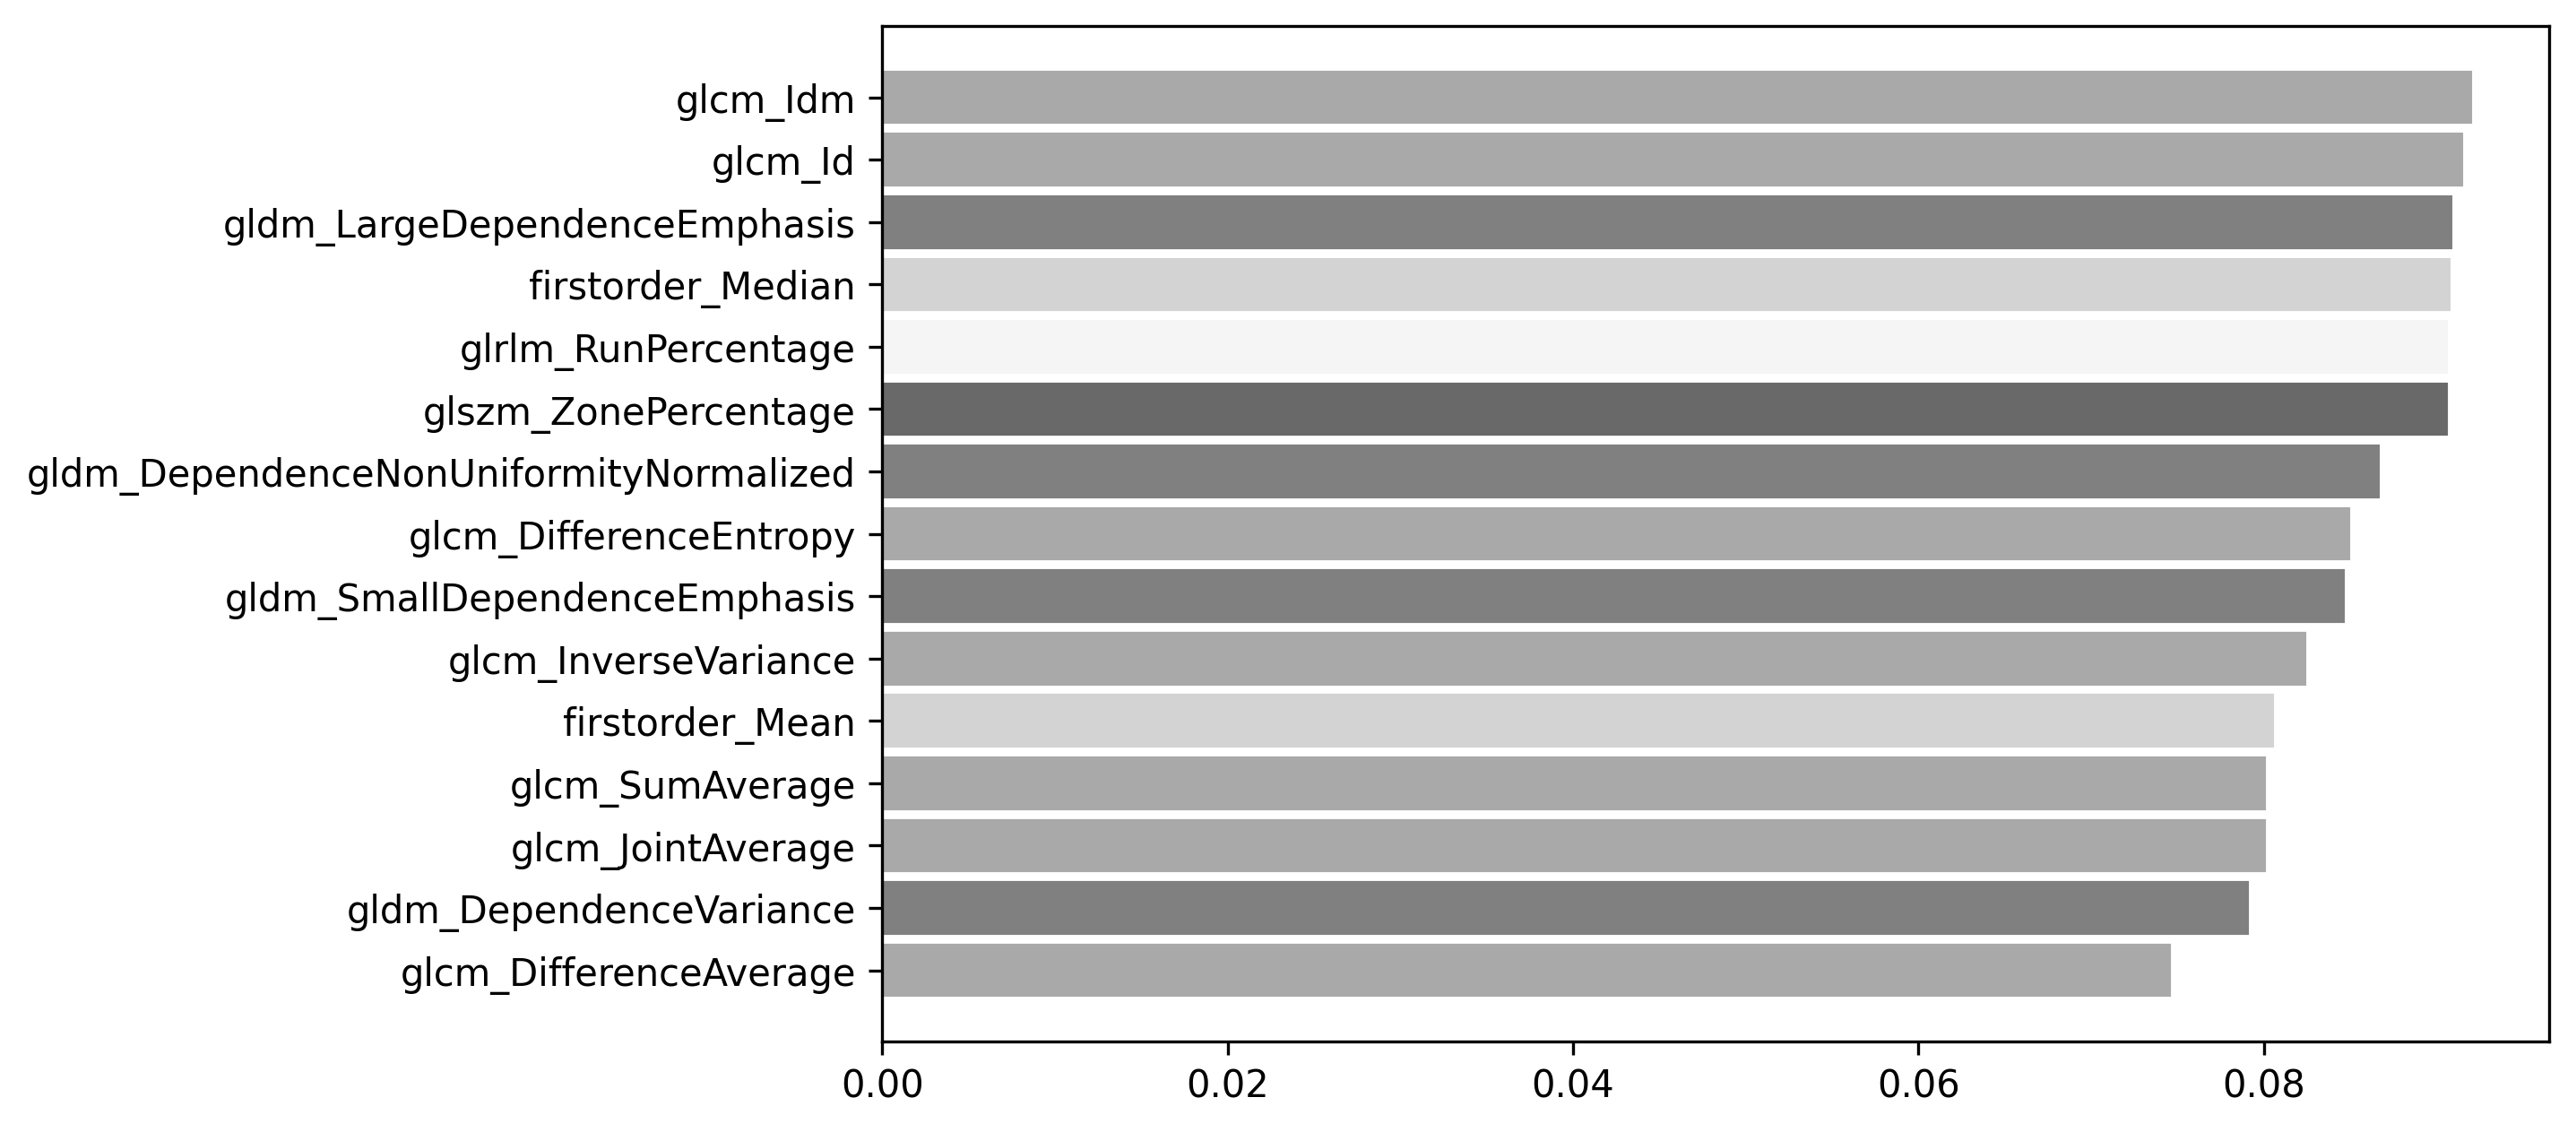

In [64]:
plt.figure(figsize = (8,5), dpi = 300)  #이미지 사이즈, 해상도 지정

index = np.arange(15)
bar=plt.barh(index,important_features_value_top15)
for i in range(15): # 특징 카테고리별로 다른 막대색 지정 
    if important_features_name_top15[i].startswith('firstorder'):
        bar[i].set_color('lightgray')
    elif important_features_name_top15[i].startswith('glcm'):
        bar[i].set_color('darkgray')
    elif important_features_name_top15[i].startswith('gldm'):
        bar[i].set_color('gray')
    elif important_features_name_top15[i].startswith('glszm'):
        bar[i].set_color('dimgray')
    elif important_features_name_top15[i].startswith('glrlm'):
        bar[i].set_color('whitesmoke')
plt.yticks(index, important_features_name_top15, rotation=0)
plt.gca().invert_yaxis()
#plt.savefig('peritumoral_top15.jpg',bbox_inches='tight') # 이미지 저장
plt.show()

## 3. test data (20개 데이터)

In [65]:
peri_image = []
peri_mask = []
for x in os.listdir(os.path.join('./TCIA','best_image')):
    peri_image.append(os.path.join('./TCIA','best_image',x))
# 전달 필요 파일
for x in os.listdir(os.path.join('./TCIA','best_image')):
    if ('Store' not in x):
        peri_mask.append(os.path.join('./TCIA','dilation15_mask',x))

In [66]:
patientId=[]
for i in range(len(peri_image)):
    patientId.append(peri_image[i][-10:-7])

### 3-1. feature extraction[특징추출]

In [67]:
peri_df_list=[]
for i in range(len(peri_image)):
    featureName=[]
    featureValue=[]
    
    img = sitk.ReadImage(peri_image[i])
    msk = sitk.ReadImage(peri_mask[i])

    settings = {'label': 2}
    extractor = featureextractor.RadiomicsFeatureExtractor(force2D=True, force2Ddimension=0, additionalInfo=True,**settings)
    extractor.enableAllFeatures()
    result = extractor.execute(img, msk, label=255)
    
    for key, value in result.items():
        if (key.startswith('original')):
            featureName.append(key)
            featureValue.append(value)
    
    df=pd.DataFrame([featureValue], columns=featureName)
    peri_df_list.append(df)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

In [69]:
patient_features=peri_df_list[0]
for i in range(1,len(peri_df_list)):
    patient_features=pd.concat([patient_features,peri_df_list[i]])
patient_features

,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.697961,201.061536,178.1937148162078,10873.0,140.333183,890.2813126546343,0.08188000668211481,10873.0,0.415195,82.0,...,4.438907949883993,0.031169729749598866,6.1731785327196835,0.15064839510714614,55.681512863747294,3.0158812526636467,0.004742274830811397,4.143596526021141,0.025537462307660283,0.17645534301398225
0,0.726765,216.980548,207.42227459942677,11027.0,157.693823,992.2569260369944,0.08998430452861109,11027.0,0.375154,101.0,...,6.281758473365651,0.01783357881689642,6.079785672348296,0.17420876031558902,48.79301378961428,4.3655747759920365,0.004490646387151383,4.258649258506923,0.028640489047361176,0.13251856521239355
0,0.879672,225.421718,216.60101569475614,11835.0,198.297159,1106.3158005400394,0.09347831014280011,11835.0,0.348586,81.0,...,6.495764080690047,0.029614608022627276,6.2619577319775415,0.14997887621461767,68.20500694306685,3.323949166900661,0.00423631818669116,4.385557032672854,0.030016719371227338,0.17009504030373634
0,0.761784,135.664047,125.39936203984452,7188.0,103.346724,567.9310242291891,0.07901099391057166,7188.0,0.529192,88.0,...,5.981472652361757,0.020178202158131136,5.781980127474914,0.18614357262103506,41.64173822115869,6.641985796253118,0.004473628278708039,5.727881973384549,0.03758366439329575,0.19050167492867398
0,0.904125,201.028874,181.72781845386248,11056.0,181.755134,971.0853531617404,0.0878333351267855,11056.0,0.383837,184.0,...,4.625612676420874,0.01491738167430212,5.637052133829264,0.1510492040520984,89.74090286492884,8.360699676185291,0.002368391823178643,2.9345206609829253,0.007210549313521187,0.06736545455164986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.803090,117.980942,113.75851616472501,6490.0,94.749298,521.6883835420698,0.08038341811125883,6490.0,0.547414,87.0,...,7.2172632915773445,0.01620248391617376,5.7900129430259595,0.18243451463790447,51.97431690558801,3.608374537910811,0.007013592753413317,3.616150384197893,0.04071089256026204,0.16204414878321216
0,0.764286,233.579169,225.5681715136247,6912.0,178.521296,807.9898987322349,0.11689668673788121,6913.0,0.364755,91.0,...,4.87838867584836,0.03522501512671259,5.735308735321966,0.17763633733545495,70.56874011925856,3.810943643512451,0.0063567903771821295,3.7309576936976594,0.04046376235481667,0.16603421986598219
0,0.671372,191.131280,182.12358441453978,9677.5,128.320110,836.416305603428,0.08642896467098196,9678.0,0.416931,90.0,...,9.2452468921054,0.01782251172584408,5.949813802919387,0.21492043810704692,22.877587832840234,4.962535601788105,0.0030653889461656507,7.263098202418713,0.04283268298042088,0.12281102620908851
0,0.871299,120.725094,112.58774356030055,6603.0,105.187653,525.6883835420698,0.07961356709708765,6603.0,0.547958,82.0,...,4.540620575904504,0.02542814103295485,6.169874577977483,0.16189610782977434,56.26340940931655,3.044166571883531,0.007709660018354666,4.1970057718705895,0.03450167965260702,0.2717226647242396


In [70]:
patient_features['PatientID']=patientId
patient_features=patient_features.set_index('PatientID')

In [71]:
patient_features.columns=patient_features.columns.str.replace('original','peri')
patient_features_peri=patient_features.astype(float)
patient_features_peri

,peri_shape2D_Elongation,peri_shape2D_MajorAxisLength,peri_shape2D_MaximumDiameter,peri_shape2D_MeshSurface,peri_shape2D_MinorAxisLength,peri_shape2D_Perimeter,peri_shape2D_PerimeterSurfaceRatio,peri_shape2D_PixelSurface,peri_shape2D_Sphericity,peri_firstorder_10Percentile,...,peri_glszm_SmallAreaHighGrayLevelEmphasis,peri_glszm_SmallAreaLowGrayLevelEmphasis,peri_glszm_ZoneEntropy,peri_glszm_ZonePercentage,peri_glszm_ZoneVariance,peri_ngtdm_Busyness,peri_ngtdm_Coarseness,peri_ngtdm_Complexity,peri_ngtdm_Contrast,peri_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
099,0.697961,201.061536,178.193715,10873.0,140.333183,890.281313,0.081880,10873.0,0.415195,82.0,...,4.438908,0.031170,6.173179,0.150648,55.681513,3.015881,0.004742,4.143597,0.025537,0.176455
239,0.726765,216.980548,207.422275,11027.0,157.693823,992.256926,0.089984,11027.0,0.375154,101.0,...,6.281758,0.017834,6.079786,0.174209,48.793014,4.365575,0.004491,4.258649,0.028640,0.132519
173,0.879672,225.421718,216.601016,11835.0,198.297159,1106.315801,0.093478,11835.0,0.348586,81.0,...,6.495764,0.029615,6.261958,0.149979,68.205007,3.323949,0.004236,4.385557,0.030017,0.170095
061,0.761784,135.664047,125.399362,7188.0,103.346724,567.931024,0.079011,7188.0,0.529192,88.0,...,5.981473,0.020178,5.781980,0.186144,41.641738,6.641986,0.004474,5.727882,0.037584,0.190502
285,0.904125,201.028874,181.727818,11056.0,181.755134,971.085353,0.087833,11056.0,0.383837,184.0,...,4.625613,0.014917,5.637052,0.151049,89.740903,8.360700,0.002368,2.934521,0.007211,0.067365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.803090,117.980942,113.758516,6490.0,94.749298,521.688384,0.080383,6490.0,0.547414,87.0,...,7.217263,0.016202,5.790013,0.182435,51.974317,3.608375,0.007014,3.616150,0.040711,0.162044
105,0.764286,233.579169,225.568172,6912.0,178.521296,807.989899,0.116897,6913.0,0.364755,91.0,...,4.878389,0.035225,5.735309,0.177636,70.568740,3.810944,0.006357,3.730958,0.040464,0.166034
005,0.671372,191.131280,182.123584,9677.5,128.320110,836.416306,0.086429,9678.0,0.416931,90.0,...,9.245247,0.017823,5.949814,0.214920,22.877588,4.962536,0.003065,7.263098,0.042833,0.122811


In [72]:
patient_features_peri=pd.merge(testing_data,patient_features_peri,on='PatientID')
patient_features_peri

,recurrence,peri_shape2D_Elongation,peri_shape2D_MajorAxisLength,peri_shape2D_MaximumDiameter,peri_shape2D_MeshSurface,peri_shape2D_MinorAxisLength,peri_shape2D_Perimeter,peri_shape2D_PerimeterSurfaceRatio,peri_shape2D_PixelSurface,peri_shape2D_Sphericity,...,peri_glszm_SmallAreaHighGrayLevelEmphasis,peri_glszm_SmallAreaLowGrayLevelEmphasis,peri_glszm_ZoneEntropy,peri_glszm_ZonePercentage,peri_glszm_ZoneVariance,peri_ngtdm_Busyness,peri_ngtdm_Coarseness,peri_ngtdm_Complexity,peri_ngtdm_Contrast,peri_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
005,1,0.671372,191.131280,182.123584,9677.5,128.320110,836.416306,0.086429,9678.0,0.416931,...,9.245247,0.017823,5.949814,0.214920,22.877588,4.962536,0.003065,7.263098,0.042833,0.122811
006,1,0.781311,204.144725,182.833257,11495.0,159.500447,1018.038672,0.088564,11495.0,0.373332,...,4.172698,0.050035,5.806139,0.209308,29.108910,17.359034,0.002260,7.365409,0.045937,0.107810
030,1,0.772078,172.855300,160.524141,9842.0,133.457816,853.771645,0.086748,9842.0,0.411912,...,7.575834,0.019415,5.824858,0.196810,42.590746,4.177470,0.004766,5.074807,0.047185,0.138219
042,1,0.962547,204.549267,181.157390,10946.0,196.888188,991.026479,0.090538,10946.0,0.374238,...,5.061208,0.030556,5.864439,0.192216,60.076876,6.997736,0.003999,3.692539,0.043750,0.087001
045,0,0.608212,188.683878,180.709712,10533.0,114.759887,903.671140,0.085794,10533.0,0.402597,...,4.594979,0.016084,6.264483,0.160163,40.456947,5.608043,0.004470,3.272625,0.021297,0.108256
047,0,0.723252,158.008383,145.773797,8576.0,114.279839,691.872150,0.080675,8576.0,0.474484,...,2.719003,0.056166,5.573494,0.205107,28.232936,24.693532,0.003142,3.781588,0.042262,0.079422
063,0,0.886046,122.019314,112.805142,6721.0,108.114786,532.617316,0.079247,6721.0,0.545640,...,4.553798,0.032247,5.831442,0.168130,64.562761,3.746565,0.006645,2.548327,0.042117,0.129394
096,1,0.809353,223.118055,204.899976,9978.0,180.581291,975.286363,0.097744,9979.0,0.363073,...,6.554149,0.025969,5.736826,0.232188,18.038334,12.283456,0.002674,7.195204,0.044196,0.104175
123,1,0.780846,191.949491,175.866427,10419.0,149.883059,873.813275,0.083867,10419.0,0.414094,...,6.380728,0.025101,6.247067,0.161532,45.597014,5.581354,0.004056,4.913138,0.039754,0.172114


### 3-2. feature selection[특징선택] - ReliefF 사용(train과 동일한 변수 순서 적용)

In [73]:
patient_features_peri_test=patient_features_peri[reliefF_list]
patient_features_peri_test

,peri_glcm_Idm,peri_glcm_Id,peri_gldm_LargeDependenceEmphasis,peri_firstorder_Median,peri_glrlm_RunPercentage,peri_glszm_ZonePercentage,peri_gldm_DependenceNonUniformityNormalized,peri_glcm_DifferenceEntropy,peri_gldm_SmallDependenceEmphasis,peri_glcm_InverseVariance,...,peri_ngtdm_Busyness,peri_firstorder_10Percentile,peri_glcm_Imc2,peri_ngtdm_Contrast,peri_glrlm_ShortRunLowGrayLevelEmphasis,peri_glszm_SmallAreaLowGrayLevelEmphasis,peri_firstorder_Kurtosis,peri_firstorder_Minimum,peri_shape2D_PerimeterSurfaceRatio,recurrence
PatientID,,,,,,,,,,,,,,,,,,,,,
005,0.891431,0.896858,6.899566,224.0,0.214920,0.214920,0.499292,0.899523,0.185713,0.157694,...,4.962536,90.0,0.986254,0.042833,0.017823,0.017823,2.565295,55.0,0.086429,1
006,0.895185,0.899103,6.949021,98.0,0.209308,0.209308,0.505133,0.853588,0.182118,0.167590,...,17.359034,72.0,0.984313,0.045937,0.050035,0.050035,2.106897,55.0,0.088564,1
030,0.899448,0.905118,7.084129,189.0,0.196810,0.196810,0.517280,0.836721,0.181738,0.142319,...,4.177470,85.0,0.990171,0.047185,0.019415,0.019415,1.333240,58.0,0.086748,1
042,0.903754,0.908109,7.127535,188.0,0.192216,0.192216,0.522798,0.801304,0.179690,0.147626,...,6.997736,104.0,0.989973,0.043750,0.030556,0.030556,1.428819,77.0,0.090538,1
045,0.929375,0.930445,7.423431,211.0,0.160163,0.160163,0.566485,0.622747,0.163259,0.130230,...,5.608043,118.0,0.988660,0.021297,0.016084,0.016084,1.514219,93.0,0.085794,0
047,0.900014,0.902786,6.996968,113.0,0.205107,0.205107,0.508504,0.797897,0.182765,0.171613,...,24.693532,90.0,0.977217,0.042262,0.056166,0.056166,2.471468,76.0,0.080675,0
063,0.917952,0.921009,7.355007,218.0,0.168130,0.168130,0.555280,0.719568,0.168907,0.132184,...,3.746565,97.0,0.981134,0.042117,0.032247,0.032247,1.652708,83.0,0.079247,0
096,0.881492,0.886289,6.739252,114.0,0.232188,0.232188,0.484112,0.913806,0.194286,0.187346,...,12.283456,82.0,0.982671,0.044196,0.025969,0.025969,2.192480,56.0,0.097744,1
123,0.924678,0.927262,7.418466,109.0,0.161532,0.161532,0.565366,0.683199,0.166304,0.122737,...,5.581354,77.0,0.986768,0.039754,0.025101,0.025101,1.238245,55.0,0.083867,1


In [74]:
patient_features_peri_test.to_csv("patient_features_peri_test.csv", index=True)

## 4. classification[분류모델 학습] & evaluation[성능평가]

In [75]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

### 4-1. 하이퍼파라미터 설정

In [76]:
#LDA

solver = ['lsqr', 'eigen']
shrinkage = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
for i in range(20,81,20):
    print("-----------------------reliefF",i,"---------------------")
    for a in solver:
        for b in shrinkage:
            X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:i].values
            y_train=patient_features_peri_train['recurrence'].values
            X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:i].values
            y_test=patient_features_peri_test['recurrence'].values

            clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver=a, shrinkage=b))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
            specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
            ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
            npv = metrics.precision_score(y_test, y_pred, pos_label=0)
            if accuracy>0.7:
                print("solv:",a,",shrink:",b,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

print("-----------------------reliefF102---------------------")
for a in solver:
    for b in shrinkage:
        X_train=patient_features_peri_train.drop('recurrence',axis=1).values
        y_train=patient_features_peri_train['recurrence'].values
        X_test=patient_features_peri_test.drop('recurrence',axis=1).values
        y_test=patient_features_peri_test['recurrence'].values

        clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver=a, shrinkage=b))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
        specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
        ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
        npv = metrics.precision_score(y_test, y_pred, pos_label=0)
        if accuracy>0.7:
            print("solv:",a,",shrink:",b,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

-----------------------reliefF 20 ---------------------
solv: lsqr ,shrink: 0.8 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: lsqr ,shrink: 0.9 / 0.75 ,  0.9230769230769231 ,  0.42857142857142855 ,  0.75 ,  0.75
solv: eigen ,shrink: 0.8 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: eigen ,shrink: 0.9 / 0.75 ,  0.9230769230769231 ,  0.42857142857142855 ,  0.75 ,  0.75
-----------------------reliefF 40 ---------------------
-----------------------reliefF 60 ---------------------
solv: lsqr ,shrink: 0.1 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: eigen ,shrink: 0.1 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
-----------------------reliefF 80 ---------------------
-----------------------reliefF106---------------------


In [83]:
#SVM

C_set = [0.1,1, 10, 50, 100]
kernel_set = ["rbf"]
gamma_set = [0.001, 0.01, 0.1,0.5, 1]

for i in range(20,81,20):
    print("-----------------------reliefF",i,"---------------------")
    for a in C_set:
        for b in kernel_set:
            for c in gamma_set:
                X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:i].values
                y_train=patient_features_peri_train['recurrence'].values
                X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:i].values
                y_test=patient_features_peri_test['recurrence'].values

                clf = make_pipeline(StandardScaler(), SVC(C=a,kernel=b,gamma=c,random_state=42))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                accuracy = metrics.accuracy_score(y_test, y_pred)
                sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                if accuracy>0.7:
                    print("c:",a,",k:",b,",g",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

print("-----------------------reliefF102---------------------")           
for a in C_set:
    for b in kernel_set:
        for c in gamma_set:
            X_train=patient_features_peri_train.drop('recurrence',axis=1).values
            y_train=patient_features_peri_train['recurrence'].values
            X_test=patient_features_peri_test.drop('recurrence',axis=1).values
            y_test=patient_features_peri_test['recurrence'].values

            clf = make_pipeline(StandardScaler(), SVC(C=a,kernel=b,gamma=c,random_state=42))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
            specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
            ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
            npv = metrics.precision_score(y_test, y_pred, pos_label=0)
            if accuracy>0.7:
                print("c:",a,",k:",b,",g",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

-----------------------reliefF 20 ---------------------
-----------------------reliefF 40 ---------------------
c: 50 ,k: rbf ,g 0.001 / 0.8 ,  1.0 ,  0.42857142857142855 ,  0.7647058823529411 ,  1.0
c: 50 ,k: rbf ,g 0.01 / 0.75 ,  1.0 ,  0.2857142857142857 ,  0.7222222222222222 ,  1.0
c: 100 ,k: rbf ,g 0.01 / 0.75 ,  1.0 ,  0.2857142857142857 ,  0.7222222222222222 ,  1.0
-----------------------reliefF 60 ---------------------
c: 10 ,k: rbf ,g 0.01 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
c: 50 ,k: rbf ,g 0.001 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
-----------------------reliefF 80 ---------------------
c: 10 ,k: rbf ,g 0.01 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
c: 100 ,k: rbf ,g 0.01 / 0.75 ,  1.0 ,  0.2857142857142857 ,  0.7222222222222222 ,  1.0
-----------------------reliefF102---------------------


In [85]:
#RF

n_estimators = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
max_depth = [None,2,4,6,8,10,12,14,16]
max_features_set = ["sqrt", "log2", "auto", None]

for i in range(20,81,20):
    print("-----------------------reliefF",i,"---------------------")
    for a in n_estimators:
        for b in max_depth:
            for c in max_features_set:
                X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:i].values
                y_train=patient_features_peri_train['recurrence'].values
                X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:i].values                
                y_test=patient_features_peri_test['recurrence'].values

                clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=a,max_depth=b,max_features=c,random_state=42))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                accuracy = metrics.accuracy_score(y_test, y_pred)
                sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                if accuracy>0.8:
                    print("n_e:",a,",m_d:",b,",m_f",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)
                
print("-----------------------reliefF102---------------------")
for a in n_estimators:
    for b in max_depth:
        for c in max_features_set:
            X_train=patient_features_peri_train.drop('recurrence',axis=1).values
            y_train=patient_features_peri_train['recurrence'].values
            X_test=patient_features_peri_test.drop('recurrence',axis=1).values
            y_test=patient_features_peri_test['recurrence'].values

            clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=a,max_depth=b,max_features=c,random_state=42))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
            specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
            ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
            npv = metrics.precision_score(y_test, y_pred, pos_label=0)
            if accuracy>0.8:
                print("n_e:",a,",m_d:",b,",m_f",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

-----------------------reliefF 20 ---------------------
-----------------------reliefF 40 ---------------------
-----------------------reliefF 60 ---------------------
-----------------------reliefF 80 ---------------------
n_e: 40 ,m_d: None ,m_f None / 0.85 ,  0.9230769230769231 ,  0.7142857142857143 ,  0.8571428571428571 ,  0.8333333333333334
n_e: 40 ,m_d: 6 ,m_f log2 / 0.85 ,  1.0 ,  0.5714285714285714 ,  0.8125 ,  1.0
n_e: 40 ,m_d: 8 ,m_f log2 / 0.85 ,  1.0 ,  0.5714285714285714 ,  0.8125 ,  1.0
n_e: 40 ,m_d: 10 ,m_f None / 0.85 ,  0.9230769230769231 ,  0.7142857142857143 ,  0.8571428571428571 ,  0.8333333333333334
n_e: 40 ,m_d: 12 ,m_f None / 0.85 ,  0.9230769230769231 ,  0.7142857142857143 ,  0.8571428571428571 ,  0.8333333333333334
n_e: 40 ,m_d: 14 ,m_f None / 0.85 ,  0.9230769230769231 ,  0.7142857142857143 ,  0.8571428571428571 ,  0.8333333333333334
n_e: 40 ,m_d: 16 ,m_f None / 0.85 ,  0.9230769230769231 ,  0.7142857142857143 ,  0.8571428571428571 ,  0.8333333333333334
n_e: 6

In [86]:
#GB

n_estimators = [1,10,50, 100]
learning_rate = [0.1,0.3,0.5,0.6, 0.7,0.8,0.9]
subsample = [0.6,0.7,0.8,0.9,1.0]
max_depth = range(3,10,2)
    
for i in range(20,81,20):
    print("-----------------------reliefF",i,"---------------------")
    for a in n_estimators:
        for b in learning_rate:
            for c in subsample:
                for d in max_depth:
                    X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:i].values
                    y_train=patient_features_peri_train['recurrence'].values
                    X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:i].values
                    y_test=patient_features_peri_test['recurrence'].values

                    clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=a,learning_rate=b, subsample=c,max_depth=d,random_state=42))
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)

                    accuracy = metrics.accuracy_score(y_test, y_pred)
                    sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                    specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                    ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                    npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                    if accuracy>=0.9:
                        print("n_e:",a,", l_r:",b,",s",c,",m_d",d,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

print("-----------------------reliefF102---------------------")
for a in n_estimators:
    for b in learning_rate:
        for c in subsample:
            for d in max_depth:
                X_train=patient_features_peri_train.drop('recurrence',axis=1).values
                y_train=patient_features_peri_train['recurrence'].values
                X_test=patient_features_peri_test.drop('recurrence',axis=1).values
                y_test=patient_features_peri_test['recurrence'].values

                clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=a,learning_rate=b, subsample=c,max_depth=d,random_state=42))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                accuracy = metrics.accuracy_score(y_test, y_pred)
                sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                if accuracy>=0.9:
                    print("n_e:",a,", l_r:",b,",s",c,",m_d",d,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)


-----------------------reliefF 20 ---------------------
-----------------------reliefF 40 ---------------------
-----------------------reliefF 60 ---------------------
n_e: 50 , l_r: 0.7 ,s 0.7 ,m_d 9 / 0.9 ,  1.0 ,  0.7142857142857143 ,  0.8666666666666667 ,  1.0
n_e: 50 , l_r: 0.8 ,s 0.8 ,m_d 7 / 0.9 ,  1.0 ,  0.7142857142857143 ,  0.8666666666666667 ,  1.0
n_e: 100 , l_r: 0.3 ,s 0.8 ,m_d 9 / 0.9 ,  1.0 ,  0.7142857142857143 ,  0.8666666666666667 ,  1.0
n_e: 100 , l_r: 0.7 ,s 0.7 ,m_d 9 / 0.9 ,  1.0 ,  0.7142857142857143 ,  0.8666666666666667 ,  1.0
-----------------------reliefF 80 ---------------------
n_e: 100 , l_r: 0.6 ,s 0.8 ,m_d 7 / 0.9 ,  1.0 ,  0.7142857142857143 ,  0.8666666666666667 ,  1.0
-----------------------reliefF102---------------------


### best hyper-parameter (Peri-tumoral)  
- LDA_20 : LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.8)  
- SVM_60 : SVC(C=50,kernel='rbf',gamma=0.001) 
- RF_80 : RandomForestClassifier(n_estimators=60,max_depth=10,max_features=None)
- GB_60 : GradientBoostingClassifier(n_estimators=100,learning_rate=0.7,subsample=0.7,max_depth=9)

### 4-2. 오분류 사항 체크

In [87]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

In [89]:
# LDA

X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:20].values
y_train=patient_features_peri_train['recurrence'].values
X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:20].values
y_test=patient_features_peri_test['recurrence'].values

model=LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.8)

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_peri_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.75 , 0.8461538461538461 , 0.5714285714285714 , 0.7857142857142857 , 0.6666666666666666
TP (11개): ['005', '006', '030', '042', '096', '123', '155', '210', '242', '252', '268']
FP (3개): ['047', '258', '276']
FN (2개): ['173', '202']
TN (4개): ['045', '063', '130', '263']


In [90]:
# SVM

X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:60].values
y_train=patient_features_peri_train['recurrence'].values
X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:60].values
y_test=patient_features_peri_test['recurrence'].values

model=SVC(C=50,kernel='rbf',gamma=0.001,random_state=42)

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_peri_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.75 , 0.8461538461538461 , 0.5714285714285714 , 0.7857142857142857 , 0.6666666666666666
TP (11개): ['005', '006', '030', '096', '123', '155', '173', '202', '210', '242', '268']
FP (3개): ['047', '063', '258']
FN (2개): ['042', '252']
TN (4개): ['045', '130', '263', '276']


In [91]:
# RF

X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:80].values
y_train=patient_features_peri_train['recurrence'].values
X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:80].values
y_test=patient_features_peri_test['recurrence'].values

model=RandomForestClassifier(n_estimators=60,max_depth=10,max_features=None,random_state=42)

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_peri_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.85 , 0.9230769230769231 , 0.7142857142857143 , 0.8571428571428571 , 0.8333333333333334
TP (12개): ['005', '006', '030', '042', '096', '123', '155', '202', '210', '242', '252', '268']
FP (2개): ['047', '258']
FN (1개): ['173']
TN (5개): ['045', '063', '130', '263', '276']


In [92]:
# GB

X_train=patient_features_peri_train.drop('recurrence',axis=1).iloc[:,:60].values
y_train=patient_features_peri_train['recurrence'].values
X_test=patient_features_peri_test.drop('recurrence',axis=1).iloc[:,:60].values
y_test=patient_features_peri_test['recurrence'].values

model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.7,subsample=0.7,max_depth=9,random_state=42)

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_peri_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_peri_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.9 , 1.0 , 0.7142857142857143 , 0.8666666666666667 , 1.0
TP (13개): ['005', '006', '030', '042', '096', '123', '155', '173', '202', '210', '242', '252', '268']
FP (2개): ['047', '258']
FN (0개): []
TN (5개): ['045', '063', '130', '263', '276']


### 4-3. 오분류 데이터 특징 확인

- 모든 모델들 결과의 공통부분과 특이 부분 위주로 파악  
 
#### LDA
FP (3개): ['047', '258', '276']   
FN (2개): ['173', '202']   

#### SVM   
FP (3개): ['047', '063', '258']   
FN (2개): ['042', '252']   

#### RF
FP (2개): ['047', '258']   
FN (1개): ['173']   

#### GB
FP (2개): ['047', '258']   
FN (0개): []

-> 가장 많이 오분류된 047, 258 환자의 영상의 특이점은 발견하지 못했음

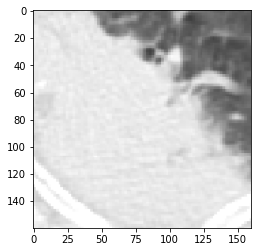

In [99]:
import cv2
plt.imshow(cv2.imread('./TCIA/best_image/276027.png'))
plt.show()

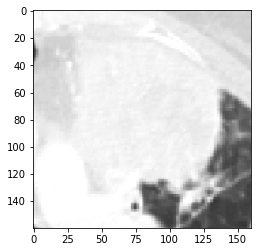

In [98]:
plt.imshow(cv2.imread('./TCIA/best_image/173036.png'))
plt.show()

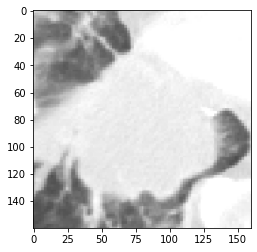

In [100]:
plt.imshow(cv2.imread('./TCIA/best_image/042034.png'))
plt.show()

-> FP, FN 모두 종양의 크기가 커서 주변부 정보 부족으로 오분류 됐을것이라 예측